In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\noemi\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')

In [4]:
df.head()

,region,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popular
0,3,0.685,0.644,10,-13.206,0,0.1550,0.302,0.000055,0.1140,0.808,164.919,169379,4,0
1,3,0.752,0.620,5,-5.536,1,0.0509,0.309,0.000000,0.0750,0.962,117.399,164459,4,0
2,1,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0
3,2,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0
4,3,0.748,0.627,7,-6.029,1,0.0639,0.131,0.000000,0.0852,0.524,120.963,188491,4,0


In [5]:
#Split the data into features and target variable
X = df.drop(columns=['popular'], axis=1)  # Features
y = df['popular']  # Target variable

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
# Train a KNN classifier (Choosing K=5 as a default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
# Make predictions
y_pred = knn.predict(X_test)

In [11]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8392529983218635

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     55340
           1       0.39      0.16      0.22      9613

    accuracy                           0.84     64953
   macro avg       0.63      0.56      0.57     64953
weighted avg       0.80      0.84      0.81     64953



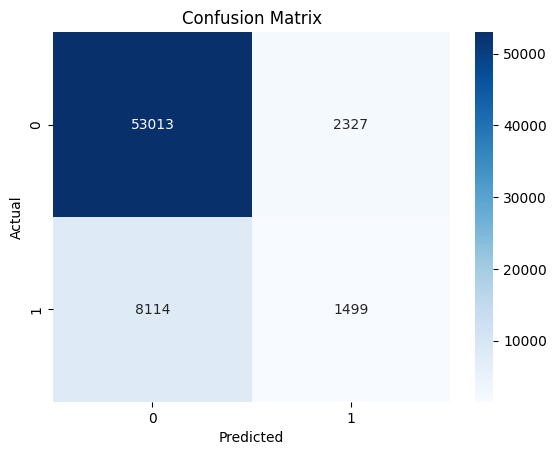

In [12]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score


In [14]:
# Cross-validation (to check model consistency)
cv_scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')

Cross-validation accuracy scores: [0.82762921 0.82527366 0.8290918  0.82644374 0.8280295 ]
Mean cross-validation accuracy: 0.8273


In [19]:
from sklearn.metrics import roc_curve, auc


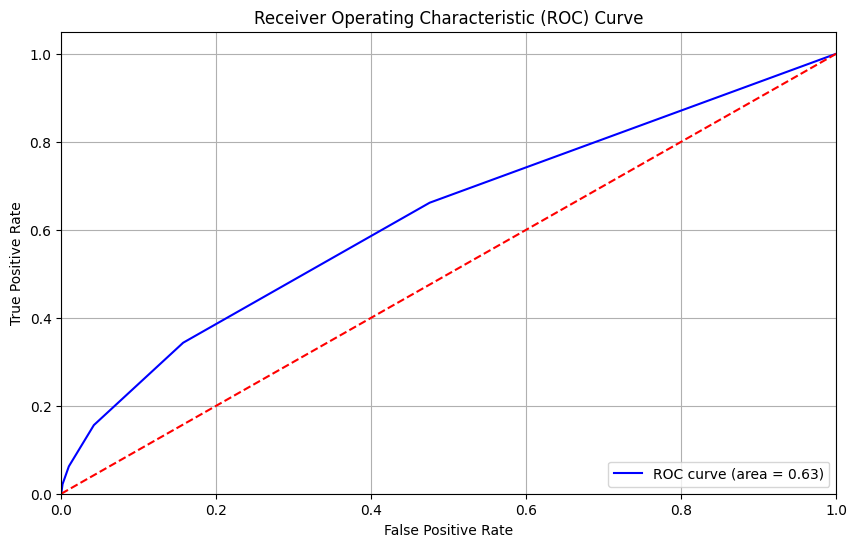

In [20]:
# Predict probabilities
y_scores = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

#Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

#Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [24]:
X.columns

Index(['region', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [27]:
# Split the dataset into features and target variable
X = df.drop('popular', axis=1)  # All features including regions
y = df['popular']  # Target variable


In [28]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [30]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [31]:
# Predict on the test set
y_pred = knn.predict(X_test_scaled)
